In [16]:
import pandas as pd
import seaborn as sn
from sklearn import tree
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve

In [17]:
df = pd.read_csv('mushrooms.csv')

df.sample(15)

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
813,p,x,y,w,t,p,f,c,n,w,...,s,w,w,p,w,o,p,n,v,g
2127,e,x,y,g,t,n,f,c,b,n,...,s,w,p,p,w,o,p,k,v,d
5842,p,f,s,g,t,f,f,c,b,h,...,f,w,w,p,w,o,p,h,v,g
1956,e,x,f,n,f,n,f,w,b,k,...,s,w,w,p,w,o,e,k,s,g
1251,e,x,f,n,t,n,f,c,b,n,...,s,w,w,p,w,o,p,n,v,d
850,e,b,s,w,t,l,f,c,b,k,...,s,w,w,p,w,o,p,n,s,g
6741,p,f,s,n,f,y,f,c,n,b,...,s,w,w,p,w,o,e,w,v,p
6849,e,b,s,n,f,n,a,c,b,n,...,s,o,o,p,o,o,p,o,c,l
2949,e,x,y,e,t,n,f,c,b,u,...,s,w,w,p,w,o,p,n,v,d
566,e,x,y,y,t,a,f,c,b,g,...,s,w,w,p,w,o,p,n,n,g


,odor,gill-size,stalk-surface-above-ring,stalk-surface-below-ring,spore-print-color
0,p,n,s,s,k
1,a,b,s,s,n
2,l,b,s,s,n
3,p,n,s,s,k
4,n,b,s,s,n
5,a,b,s,s,k
6,a,b,s,s,k
7,l,b,s,s,n
8,p,n,s,s,k
9,a,b,s,s,k


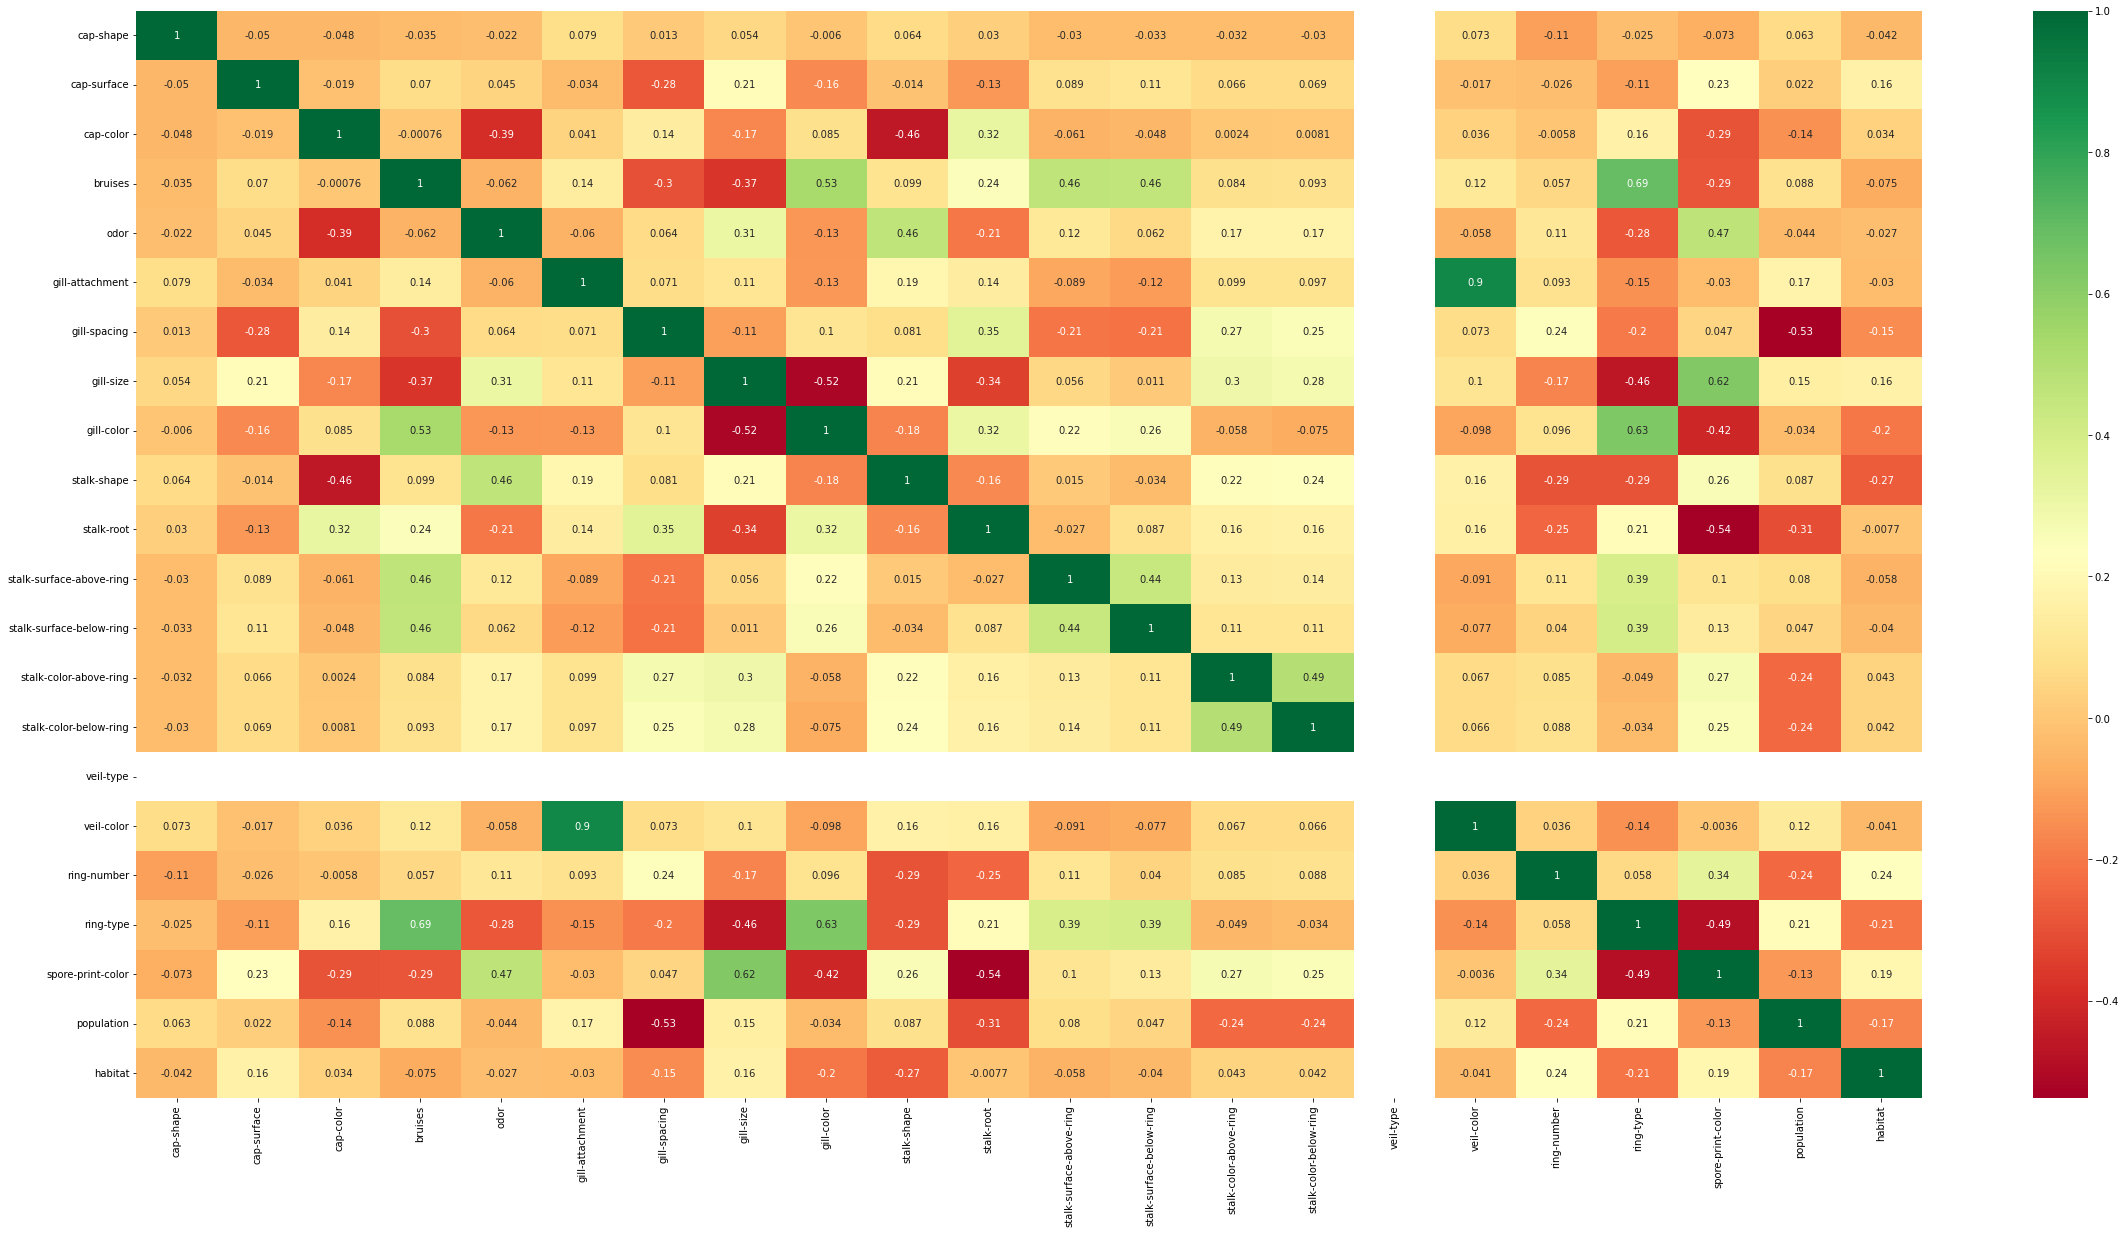

In [18]:
le = LabelEncoder() # creates an instance of the label encoder

# separate the class column from the rest of the dataset
class_column = df.iloc[:,0]
dataset = df.iloc[:,1:]

# switch categorical values in columns into numerical in order to create a heatmap and perform feature selection
feature_selection_dataset = dataset.apply(le.fit_transform)

# transform class atributes from categorial to numerical values
class_column = le.fit_transform(class_column)

# drop veil-type column as it only has one value and will not impact the correctness of the research
dataset.drop(columns=['veil-type'])

fig_size = (40, 20)
fig, ax = plt.subplots(figsize=fig_size)
sn.heatmap(feature_selection_dataset.corr(), ax=ax, annot=True, cmap="RdYlGn")

# bruises, odor, gill_size, stalk-surface-above-ring, stalk-surface-below-ring, ring-type, spore-print-color
dataset = dataset.loc[:, ['odor', 'gill-size', 'stalk-surface-above-ring', 'stalk-surface-below-ring', 'spore-print-color']]
dataset.head(10)

In [19]:
# get_dummies function is a label encoder that changes the categorial values to numerical and separates them into their own columns
encoded_dataset = pd.get_dummies(dataset, prefix_sep='_')

encoded_dataset.sample(5)


,odor_a,odor_c,odor_f,odor_l,odor_m,odor_n,odor_p,odor_s,odor_y,gill-size_b,...,stalk-surface-below-ring_y,spore-print-color_b,spore-print-color_h,spore-print-color_k,spore-print-color_n,spore-print-color_o,spore-print-color_r,spore-print-color_u,spore-print-color_w,spore-print-color_y
6255,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
1497,0,0,0,0,0,1,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0
275,1,0,0,0,0,0,0,0,0,1,...,1,0,0,0,1,0,0,0,0,0
7723,0,0,0,0,0,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
676,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [20]:
from sklearn.model_selection import train_test_split

encoded_dataset_train, encoded_dataset_test, class_column_train, class_column_test = train_test_split(encoded_dataset, class_column, test_size=0.25,  random_state=666)


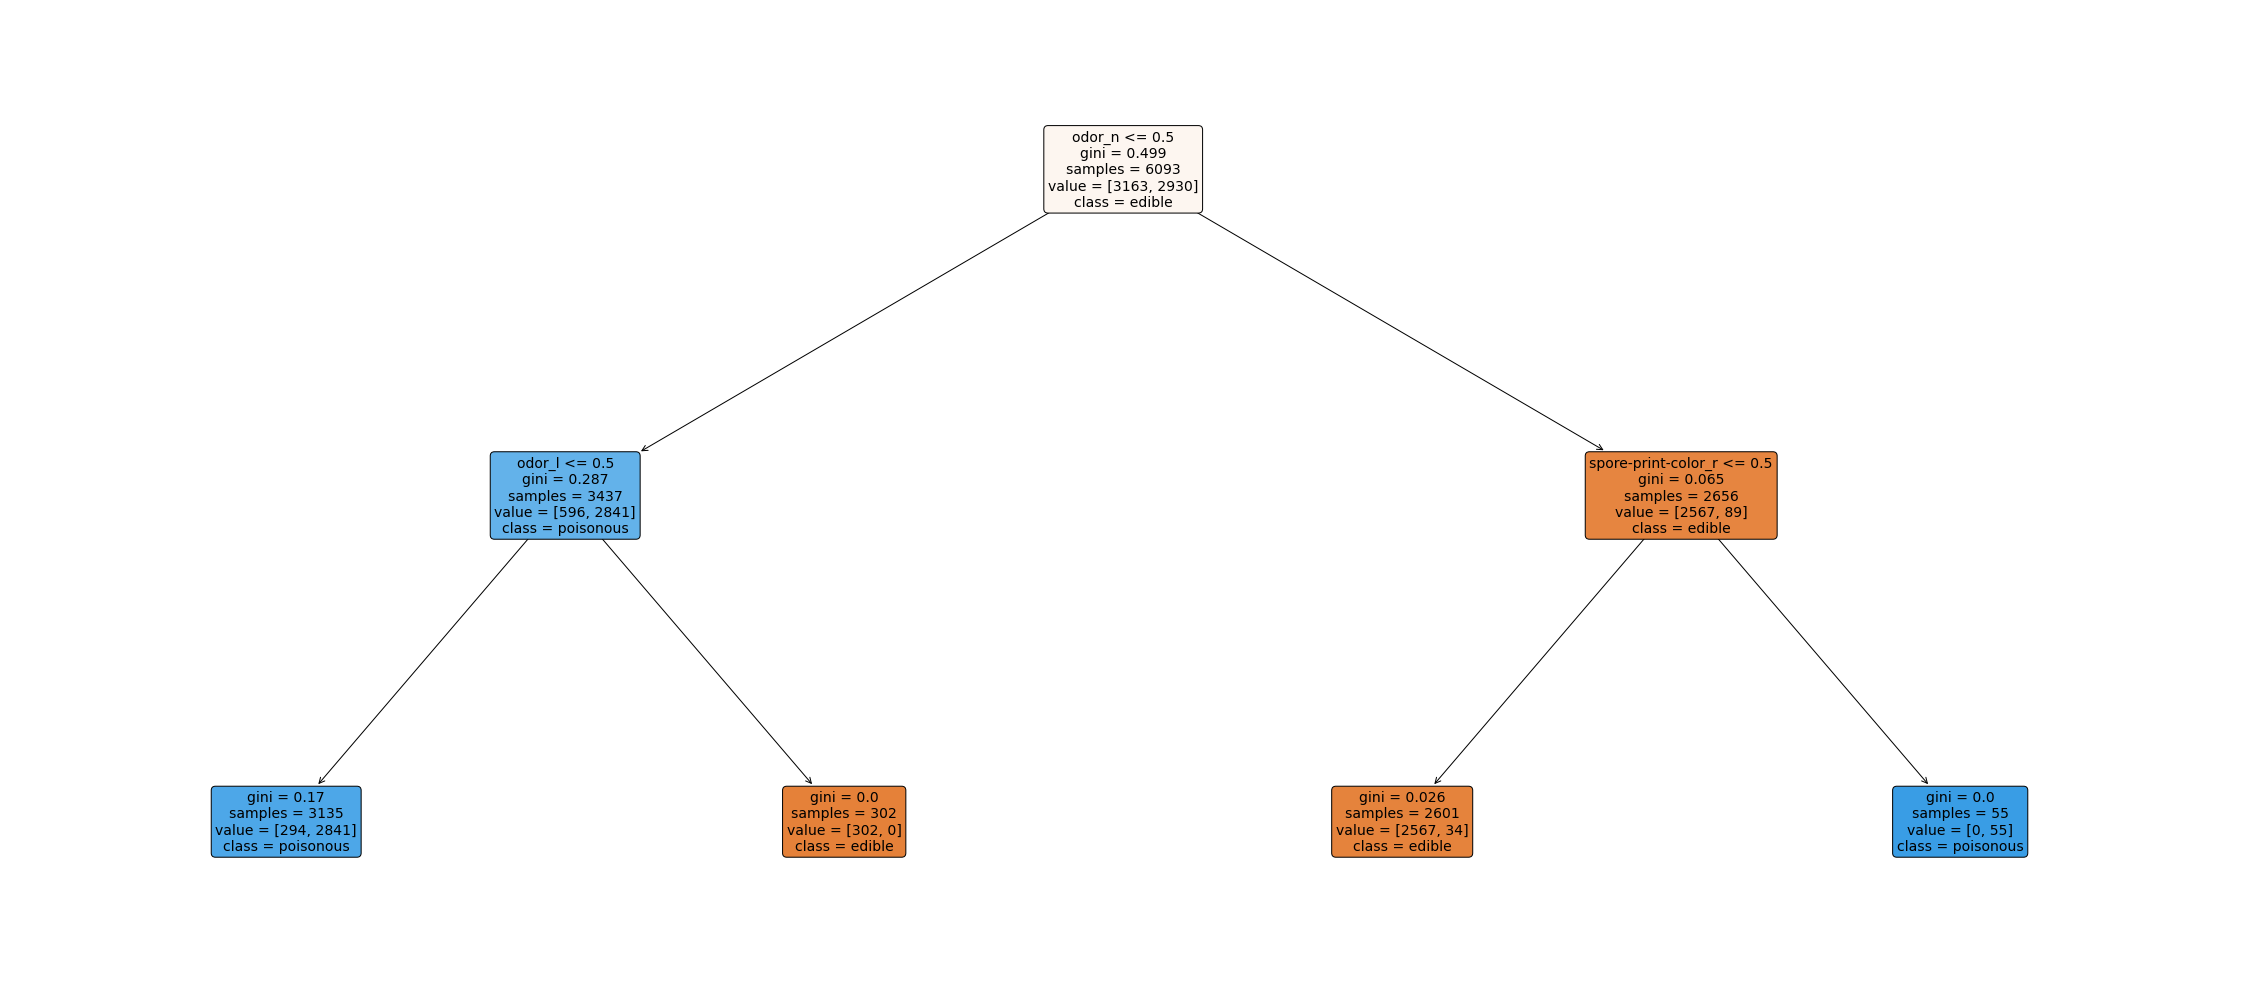

In [32]:
clf = tree.DecisionTreeClassifier(max_depth=2)
clf = clf.fit(encoded_dataset_train, class_column_train)

plt.figure(figsize=(40,18), facecolor ='w')

a = tree.plot_tree(clf,
                  feature_names=encoded_dataset_train.columns,
                  class_names=('edible', 'poisonous'),
                  rounded = True,
                  filled = True,
                  fontsize=14)

In [22]:
decision_tree_prediction = clf.predict(encoded_dataset_test)

def plot_roc_curve(true_class, prediction):
    fpr, tpr, thresholds = roc_curve(true_class, decision_tree_prediction)
    plt.plot(fpr, tpr)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC curve')

def results(prediction):
    print(accuracy_score(class_column_test, decision_tree_prediction))
    print(classification_report(class_column_test, decision_tree_prediction))
    print(confusion_matrix(class_column_test, decision_tree_prediction))

def sensitivity_and_specificity(prediction):
    cm = confusion_matrix(class_column_test, decision_tree_prediction)
    sensitivity = cm[0,0]/(cm[0,0]+cm[0,1])
    print('Sensitivity : ', sensitivity)
    specificity = cm[1,1]/(cm[1,0]+cm[1,1])
    print('Specificity : ', specificity)


0.9965534219596258
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1045
           1       0.99      1.00      1.00       986

    accuracy                           1.00      2031
   macro avg       1.00      1.00      1.00      2031
weighted avg       1.00      1.00      1.00      2031

[[1040    5]
 [   2  984]]
Sensitivity :  0.9952153110047847
Specificity :  0.9979716024340771


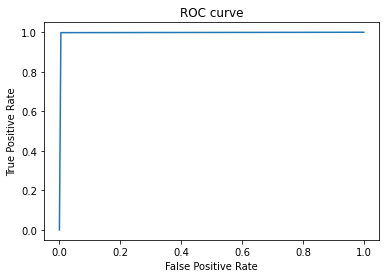

In [23]:
results(decision_tree_prediction)

plot_roc_curve(class_column_test, decision_tree_prediction)

sensitivity_and_specificity(decision_tree_prediction)

# KNN

In [24]:
from matplotlib import pyplot as plt
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve
from sklearn.neighbors import KNeighborsClassifier

def plot_roc_curve(true_class, prediction):
    fpr, tpr, thresholds = roc_curve(true_class, prediction)
    plt.plot(fpr, tpr)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC curve')

def results(prediction):
    print(accuracy_score(class_column_test, prediction))
    print(classification_report(class_column_test, prediction))
    print(confusion_matrix(class_column_test, prediction))

def sensitivity_and_specificity(prediction):
    cm = confusion_matrix(class_column_test, prediction)
    sensitivity = cm[0,0]/(cm[0,0]+cm[0,1])
    print('Sensitivity : ', sensitivity)
    specificity = cm[1,1]/(cm[1,0]+cm[1,1])
    print('Specificity : ', specificity)

def KNN(n):
    knn = KNeighborsClassifier(n_neighbors=n)
    knn.fit(encoded_dataset_train, class_column_train)
    pred = knn.predict(encoded_dataset_test)

    results(pred)
    print("\n")
    plot_roc_curve(pred, class_column_test)
    sensitivity_and_specificity(pred)

0.999015263417036
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1045
           1       1.00      1.00      1.00       986

    accuracy                           1.00      2031
   macro avg       1.00      1.00      1.00      2031
weighted avg       1.00      1.00      1.00      2031

[[1045    0]
 [   2  984]]


Sensitivity :  1.0
Specificity :  0.9979716024340771


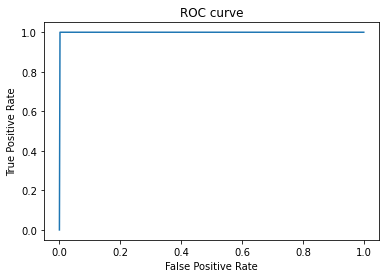

In [25]:
KNN(11)

0.999015263417036
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1045
           1       1.00      1.00      1.00       986

    accuracy                           1.00      2031
   macro avg       1.00      1.00      1.00      2031
weighted avg       1.00      1.00      1.00      2031

[[1045    0]
 [   2  984]]


Sensitivity :  1.0
Specificity :  0.9979716024340771


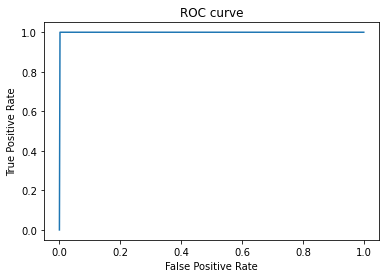

In [26]:
KNN(19)

0.9916297390448056
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      1045
           1       1.00      0.98      0.99       986

    accuracy                           0.99      2031
   macro avg       0.99      0.99      0.99      2031
weighted avg       0.99      0.99      0.99      2031

[[1045    0]
 [  17  969]]


Sensitivity :  1.0
Specificity :  0.9827586206896551


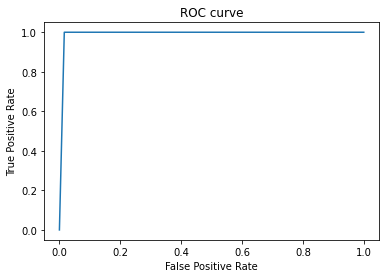

In [27]:
KNN(79)

# K-Means Clustering

In [28]:
from sklearn.cluster import KMeans

def K_means(rand, alg):
    kmeans = KMeans(init="k-means++",algorithm=alg, n_clusters=2, random_state=rand, n_init= 10).fit(encoded_dataset_train)
    pred = kmeans.predict(encoded_dataset_test)

    results(pred)
    plot_roc_curve(pred, class_column_test)
    sensitivity_and_specificity(pred)

In [29]:
K_means(0, "lloyd")

ValueError: Algorithm must be 'auto', 'full' or 'elkan', got lloyd instead.

0.8616445100935499
              precision    recall  f1-score   support

           0       0.80      0.98      0.88      1045
           1       0.97      0.73      0.84       986

    accuracy                           0.86      2031
   macro avg       0.89      0.86      0.86      2031
weighted avg       0.88      0.86      0.86      2031

[[1026   19]
 [ 262  724]]
Sensitivity :  0.9818181818181818
Specificity :  0.7342799188640974


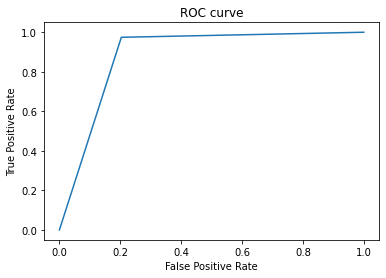

In [30]:
K_means(100, "elkan")

In [31]:
import numpy as np
from sklearn.model_selection import cross_val_score

n_features = encoded_dataset.shape[1]
clf = KNeighborsClassifier()
feature_score = []

for i in range(n_features):
    X_feature= np.reshape(encoded_dataset.iloc[:,i:i+1],-1,1)
    scores = cross_val_score(clf, X_feature, class_column)
    feature_score.append(scores.mean())
    print('%40s        %g' % (encoded_dataset.columns[i], scores.mean()))

TypeError: order must be str, not int